# Análise comparativa de modelos

## Visão Geral do Notebook

Neste notebook, buscamos prever a sobrevivência dos passageiros do **Titanic** utilizando o conjunto de dados disponível no **[Kaggle](https://www.kaggle.com/c/titanic/data)**. A metodologia seguiu etapas de obtenção, preparação e modelagem dos dados, começando pela limpeza e transformação, incluindo imputação de valores faltantes, codificação de variáveis categóricas, normalização de variáveis numéricas e tratamento de outliers. 

Em seguida, treinamos e comparamos quatro modelos preditivos: Regressão Logística, Random Forest, Support Vector Machine (SVM) e K-Nearest Neighbors (KNN), usando validação cruzada para garantir a robustez dos resultados. Este estudo visa identificar o modelo mais eficaz para prever a sobrevivência dos passageiros com base em suas características demográficas e socioeconômicas.

## Metodolodia

Neste estudo, o objetivo é prever a sobrevivência dos passageiros a bordo do RMS Titanic com base em diversas características demográficas e socioeconômicas. O conjunto de dados do **Titanic**, está disponível no **[Kaggle](https://www.kaggle.com/c/titanic/data)**. A metodologia adotada foi estruturada em várias etapas: **obtenção de dados**, **preparação dos dados**, **modelagem preditiva**, e **validação dos modelos**.
    
**Obtenção de Dados:**

   - Nesta etapa, carregamos e exploramos o conjunto de dados Titanic para conhecer suas principais características. O dataset inclui informações sobre os passageiros, como idade, gênero, classe e tarifa paga. Usamos essas informações para prever se os passageiros sobreviveram ou não.

**Preparação de Dados:**

   - A preparação dos dados envolve a limpeza e transformação necessárias para garantir que os dados estejam prontos para a modelagem. Isso inclui:
   
     - **Tratamento de dados faltantes:** Onde as colunas com valores faltantes foram tratadas utilizando métodos específicos. A coluna `'deck'` foi removida devido ao grande número de valores ausentes. Para as variaveis contínuas foi utilizada a média e para as variáveis nominais foi utilizada a moda.
          
     - **Codificação de variáveis:** As variáveis nominais foram codificadas com o OneHotEncoder, que as transforma em colunas binárias (0 ou 1). A opção drop='first' foi usada para excluir a primeira categoria de cada variável, evitando multicolinearidade e reduzindo o número de colunas.
     
     - **Normalização de variáveis:** As variáveis numéricas foram identificadas e selecionadas para normalização utilizando o `StandardScaler` do Scikit-Learn. O scaler foi aplicado para transformar as colunas selecionadas, resultando em um DataFrame com valores normalizados..

     - **Tratamento de outliers:** Os outliers nas variáveis foram tratados utilizando métodos de capping baseados no IQR, limitando os valores dentro de intervalos definidos. Para detectar outliers restantes, foi aplicada uma função de detecção também baseada no IQR.

**Modelagem Preditiva:**

- Quatro modelos foram treinados para prever a sobrevivência:

  - **Baseline Model (Regressão Logística)**: Um modelo simples que serve como ponto de partida para comparação com modelos mais complexos. Ele utiliza a regressão logística, que é eficaz em problemas de classificação binária.
  
  - **Random Forest Classifier**: Um modelo avançado que combina múltiplas árvores de decisão (ensemble) para melhorar a precisão e reduzir o risco de overfitting. Ele funciona bem em dados com muitas variáveis e interações complexas.
  
  - **Support Vector Machine (SVM)**: Um modelo que maximiza a margem entre as classes, separando os dados com o maior intervalo possível. É particularmente útil em cenários onde as classes são difíceis de separar linearmente.
  
  - **K-Nearest Neighbors (KNN)**: Um modelo intuitivo que classifica um ponto de dados com base na proximidade dos seus vizinhos mais próximos. Embora simples, ele pode ser poderoso em cenários com padrões claros, mas é sensível a outliers e ao ruído.

**Validação dos Modelos:**

- A validação cruzada com k-fold (k=5) foi usada para garantir resultados mais confiáveis e aplicáveis. Isso permite avaliar cada modelo em diferentes partes do conjunto de dados, evitando depender de apenas uma divisão específica dos dados.

**Este notebook é uma ferramenta prática para aprender e aplicar técnicas de machine learning em problemas parecidos. No final, queremos encontrar o melhor modelo para o conjunto de dados [Titanic](https://www.kaggle.com/c/titanic/data) e obter dicas úteis sobre como escolher algoritmos para problemas de classificação.**

### 1. Obtenção de dados

#### 1.1. Configuração do Ambiente: Importação das Bibliotecas Necessárias para Análise e Modelagem

In [30]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from IPython.display import display, Markdown

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### 1.2. Carregamento dos Dados e Inspeção Inicial

In [31]:
# Exibição da descrição do conjunto de dados

display(Markdown(
    "---\n"
    "O conjunto de dados Titanic, utilizado neste estudo, foi obtido da plataforma Kaggle, mas também está disponível em outras fontes. Este dataset é amplamente reconhecido e utilizado para análises exploratórias de dados e projetos de aprendizado de máquina devido às informações detalhadas que fornece sobre os passageiros do RMS Titanic. O Titanic afundou na noite de 15 de abril de 1912 após colidir com um iceberg, resultando na perda de muitas vidas. O dataset inclui dados abrangentes sobre os passageiros, como informações de embarque e sobrevivência, permitindo realizar diversas análises e modelagens preditivas relacionadas a este evento histórico trágico."
    "\n\n"
    "No conjunto de dados, a variável dependente é `Survived`, e as variáveis preditoras são: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, `Class`, `Who`, `Adult_male`, `Deck`, `Embark_town`, `Alive`, e `Alone`."
    "\n\n"
))

# Carregamento dos dados do arquivo CSV

df = pd.read_csv("../data/raw/titanic.csv")
display(df.head())

---
O conjunto de dados Titanic, utilizado neste estudo, foi obtido da plataforma Kaggle, mas também está disponível em outras fontes. Este dataset é amplamente reconhecido e utilizado para análises exploratórias de dados e projetos de aprendizado de máquina devido às informações detalhadas que fornece sobre os passageiros do RMS Titanic. O Titanic afundou na noite de 15 de abril de 1912 após colidir com um iceberg, resultando na perda de muitas vidas. O dataset inclui dados abrangentes sobre os passageiros, como informações de embarque e sobrevivência, permitindo realizar diversas análises e modelagens preditivas relacionadas a este evento histórico trágico.

No conjunto de dados, a variável dependente é `Survived`, e as variáveis preditoras são: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, `Class`, `Who`, `Adult_male`, `Deck`, `Embark_town`, `Alive`, e `Alone`.



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 1.3. Dicionário de dados

In [32]:
# Carregamento do dicionário de dados

df_dict = pd.read_csv("../data/external/dictionary.csv")
display(df_dict)

display(Markdown(
    "---\n"
    "* O conjunto de dados inclui 15 variáveis, sendo 8 qualitativas nominais, 3 qualitativas ordinais e 4 quantitativas, das quais 2 são contínuas e 2 são discretas."
    "\n\n"
))

,variavel,descrição,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu (sim = 1 ou ...,qualitativa,nominal
1,pclass,"Classe do ticket do passageiro (1 = 1ª, 2 = 2ª...",qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Número de irmãos/cônjuges a bordo,quantitativa,discreta
5,parch,Número de pais/filhos a bordo,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro,quantitativa,contínua
7,embarked,Porto de embarque (C = Cherbourg; Q = Queensto...,qualitativa,nominal
8,class,"Classe do ticket (Primeira, Segunda, Terceira)",qualitativa,ordinal
9,who,"Descrição da pessoa (homem, mulher, criança)",qualitativa,nominal


---
* O conjunto de dados inclui 15 variáveis, sendo 8 qualitativas nominais, 3 qualitativas ordinais e 4 quantitativas, das quais 2 são contínuas e 2 são discretas.



#### 1.4. Informações gerais do DataFrame

In [33]:
# Resumo das informações do DataFrame

df.info()

display(Markdown(
    "---\n"
    "* O DataFrame contém 891 entradas e 15 colunas. As colunas possuem diferentes tipos de dados: `int64` (4 colunas), `float64` (2 colunas), `object` (7 colunas) e `bool` (2 colunas). Algumas colunas apresentam valores ausentes, como `age` (177 ausentes), `embarked` (2 ausentes), `deck` (688 ausentes) e `embark_town` (2 ausentes)."
    "\n\n"
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


---
* O DataFrame contém 891 entradas e 15 colunas. As colunas possuem diferentes tipos de dados: `int64` (4 colunas), `float64` (2 colunas), `object` (7 colunas) e `bool` (2 colunas). Algumas colunas apresentam valores ausentes, como `age` (177 ausentes), `embarked` (2 ausentes), `deck` (688 ausentes) e `embark_town` (2 ausentes).



#### 1.5. Estatística descritiva do conjunto de dados

In [34]:
# Visualizar a estatística descritiva do conjunto de dados

df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* O conjunto de dados do Titanic contém 891 entradas e 15 colunas, incluindo variáveis numéricas e categóricas. Cerca de 38% dos passageiros sobreviveram, a maioria estava na terceira classe, e a idade média dos passageiros era de 29,7 anos. A maioria era do sexo masculino e embarcou em Southampton. Algumas colunas, como `age`, `deck` e `embark_town`, possuem valores ausentes. As tarifas pagas variam amplamente, com uma média de 32,2 e um valor máximo de 512,33.

### 2. Preparação de dados

#### 2.1. Preparação das Variáveis para Análise

In [35]:
# Definição da variável alvo

target_column = 'survived'
nominal_columns = (
    df_dict
    .query("subtipo == 'nominal' and variavel != @target_column")
    .variavel
    .to_list()
)
continuous_columns = (
    df_dict
    .query("subtipo == 'continua'")
    .variavel
    .to_list()
)

X = df.drop(columns=[target_column], axis=1)
y = df[target_column]

* O processo define a coluna `'survived'` como a variável alvo e categoriza as outras colunas em variáveis nominais e contínuas usando um DataFrame auxiliar (`df_dict`). As features (`X`) são formadas excluindo a coluna alvo do DataFrame original, enquanto a variável alvo (`Y`) é extraída separadamente, preparando os dados para pré-processamento e modelagem.

#### 2.2. Tratamento de dados discrepantes

In [36]:
# Tratamento de dados discrepantes

# Remoção a coluna 'deck' devido ao grande número de valores ausentes

df.drop(columns=['deck'], inplace=True)

nominal_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='most_frequent')), # tratamento de dados faltantes
    ('encoding', OneHotEncoder(sparse_output=False, drop='first')), # codificação de variáveis
    ('normalization', StandardScaler()) # normalização de dados
])
continuous_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='mean')), # tratamento de dados faltantes
    ('normalization', StandardScaler()) # normalização de dados
])

preprocessor = ColumnTransformer([
    ('nominal', nominal_preprocessor, nominal_columns),
    ('continuous', continuous_preprocessor, continuous_columns)
])

* A coluna `'deck'` foi removida devido ao grande número de valores ausentes. 

* Em seguida, foi criado um pipeline para o pré-processamento das variáveis nominais, que incluiu imputação de dados faltantes com a moda, codificação com OneHotEncoder (excluindo a primeira categoria para evitar multicolinearidade), e normalização. 

* Outro pipeline foi criado para as variáveis contínuas, envolvendo imputação com a média e normalização. 

* Por fim, ambos os pipelines foram combinados em um `ColumnTransformer` para aplicar as transformações de forma adequada às variáveis nominais e contínuas.

In [37]:
# Aplicando o pipeline de pré-processamento aos dados X

X_transformed = preprocessor.fit_transform(X)

# Verificando se ainda existem dados faltantes

np.isnan(X_transformed).sum()

0

* O pipeline de pré-processamento foi aplicado ao conjunto de dados `X`, transformando as variáveis nominais e contínuas de acordo com as etapas definidas anteriormente. 

* Após a transformação, foi verificado que não há mais dados faltantes, com a soma de valores `NaN` resultando em 0.

#### 2.3. Identificação e Visualização de OutliXrs usando o Método do IQR

Número de outliers por coluna: 

parch       213
fare        116
age          66
sibsp        46
survived      0
pclass        0
dtype: int64


,survived,pclass,age,sibsp,parch,fare
1,1,1,38.0,1,0,71.2833
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


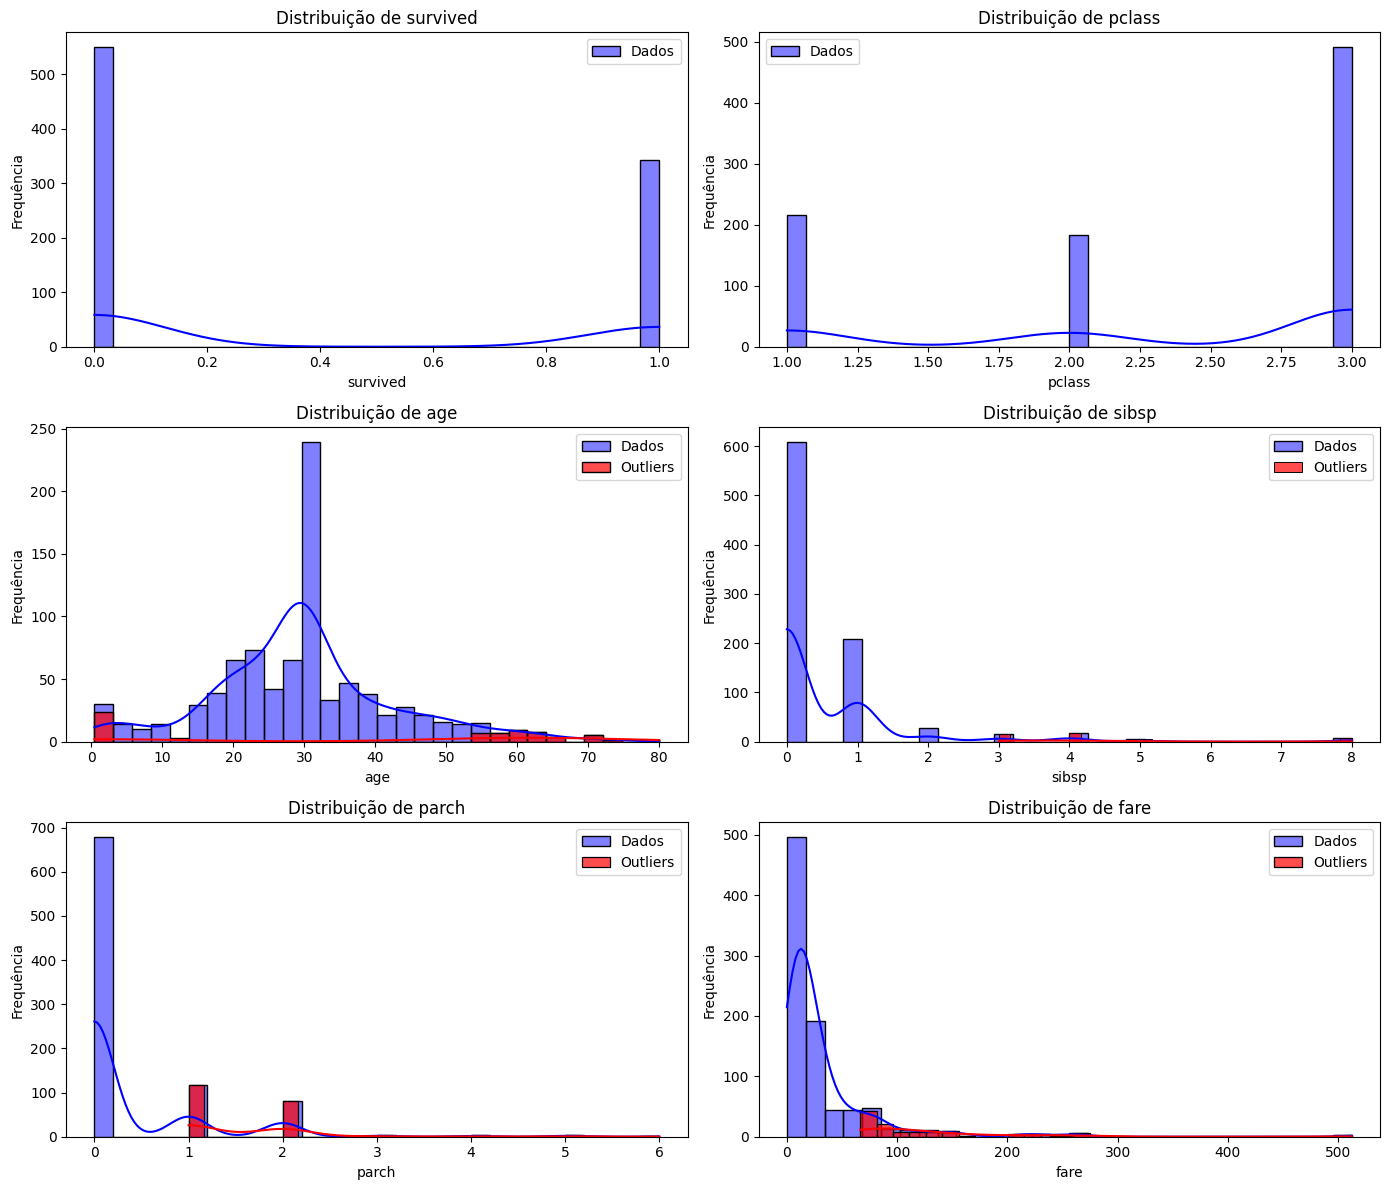

In [70]:
# Identificação de outliers usando o método do IQR (Interquartile Range)

numeric_df = df.select_dtypes(include=[np.number])

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Aplicando a função a todas as colunas numéricas
outliers = numeric_df.apply(detect_outliers_iqr)

# Filtrando os dados para mostrar apenas os outliers
outliers_summary = outliers.sum().sort_values(ascending=False)
outliers_data = numeric_df[outliers.any(axis=1)]
print("Número de outliers por coluna: \n")
print(outliers_summary)
display(outliers_data.head())

# Visualização gráfica
num_cols = numeric_df.shape[1]
num_rows = (num_cols + 1) // 2  # Calcula o número de linhas necessário
plt.figure(figsize=(14, num_rows * 4))

for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(numeric_df[column], bins=30, kde=True, color='blue', label='Dados')
    sns.histplot(numeric_df[column][outliers[column]], bins=30, kde=True, color='red', label='Outliers', alpha=0.7)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()

* Os dados mostram que as colunas `parch` e `fare` têm mais outliers, enquanto `age` e `sibsp` têm menos. Não há outliers em `survived` e `pclass`. Exemplos de outliers incluem passageiros com idades muito jovens ou tarifas muito altas.

#### 2.3.1 Tratamento de dados com outliers

In [71]:
# Função para tratamento de outliers
def cap_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Aplicação do cap
    capped_data = np.where(data < lower_bound, lower_bound, 
                           np.where(data > upper_bound, upper_bound, data))
    return capped_data

# Função para detecção de outliers usando IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Aplicar o cap nos outliers
df['age'] = cap_outliers(df['age'])
df['sibsp'] = cap_outliers(df['sibsp'])
df['parch'] = cap_outliers(df['parch'])
df['fare'] = cap_outliers(df['fare'])

# Detecção de outliers restantes por IQR
outliers_age = detect_outliers_iqr(df['age'])
outliers_sibsp = detect_outliers_iqr(df['sibsp'])
outliers_parch = detect_outliers_iqr(df['parch'])
outliers_fare = detect_outliers_iqr(df['fare'])

# Exibir os resultados atualizados
print(f"Outliers restantes na coluna 'age': {outliers_age.sum()}")
print(f"Outliers restantes na coluna 'sibsp': {outliers_sibsp.sum()}")
print(f"Outliers restantes na coluna 'parch': {outliers_parch.sum()}")
print(f"Outliers restantes na coluna 'fare': {outliers_fare.sum()}")

Outliers restantes na coluna 'age': 0
Outliers restantes na coluna 'sibsp': 0
Outliers restantes na coluna 'parch': 0
Outliers restantes na coluna 'fare': 0


* Os outliers nas colunas `age`, `sibsp`, `parch` e `fare` foram tratados limitando os valores extremos para ficar dentro de um intervalo específico. Após aplicar essa correção, uma nova verificação foi feita e não foram encontrados mais outliers nas colunas mencionadas. Assim, os dados estão agora sem valores extremos e prontos para análise.

### 3. Modelagem Preditiva

#### 3.1. Resultados Gerais

#### 3.2. Persistência do Modelo

### 4. Validação dos Modelos